In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:

IMAGE_SIZE = [224, 224]

In [ ]:
train_path = '/content/drive/MyDrive/CAD/train'
test_path = '/content/drive/MyDrive/CAD/val'

Working with 730 images
Image examples: 
IM00317.jpg


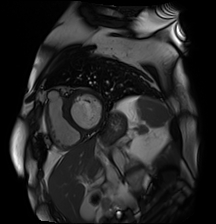

IM00272.jpg


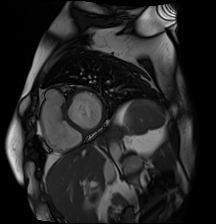

IM00355.jpg


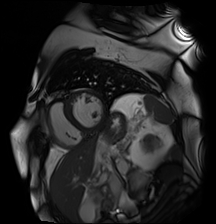

IM00585.jpg


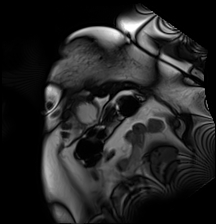

IM00374.jpg


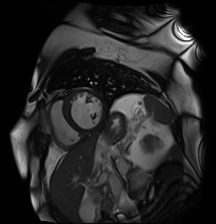

IM00279.jpg


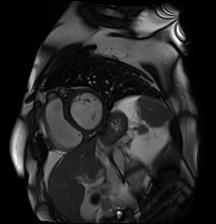

IM00304.jpg


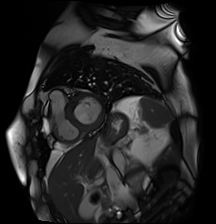

IM00541.jpg


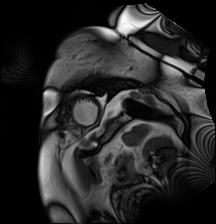

IM00630.jpg


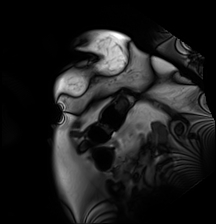

IM00369.jpg


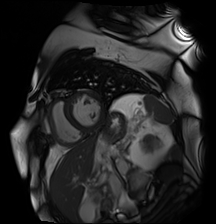

In [ ]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/Sick'


onlynormalfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlynormalfiles)))
print("Image examples: ")


for i in range(10):
    print(onlynormalfiles[i])
    display(_Imgdis(filename=folder + "/" + onlynormalfiles[i], width=240, height=240))

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg.input


<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/CAD/train/*')
print(len(folders))

2


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1630 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 701 images belonging to 2 classes.


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

<ipython-input-15-4a1a319319e3>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/10



Epoch 1: val_loss improved from inf to 5.00952, saving model to mymodel.h5
5/5 - 224s - loss: 4.9178 - accuracy: 0.6500 - val_loss: 5.0095 - val_accuracy: 0.7104 - 224s/epoch - 45s/step
Epoch 2/10


5/5 - 2s - loss: 2.7538 - accuracy: 0.8000 - 2s/epoch - 481ms/step
Epoch 3/10


5/5 - 5s - loss: 1.1886 - accuracy: 0.9367 - 5s/epoch - 917ms/step
Epoch 4/10


5/5 - 3s - loss: 0.4631 - accuracy: 0.9563 - 3s/epoch - 665ms/step
Epoch 5/10


5/5 - 3s - loss: 0.6356 - accuracy: 0.9563 - 3s/epoch - 588ms/step
Epoch 6/10


5/5 - 2s - loss: 0.4320 - accuracy: 0.9500 - 2s/epoch - 490ms/step
Epoch 7/10


5/5 - 3s - loss: 0.2878 - accuracy: 0.9875 - 3s/epoch - 683ms/step
Epoch 8/10


5/5 - 2s - loss: 0.3791 - accuracy: 0.9563 - 2s/epoch - 481ms/step
Epoch 9/10


5/5 - 2s - loss: 0.2591 - accuracy: 0.9750 - 2s/epoch - 463ms/step
Epoch 10/10


5/5 - 2s - loss: 0.2480 - accuracy: 0.9812 - 2s/epoch - 474ms/step
Training completed in time:  0:05:06.268035


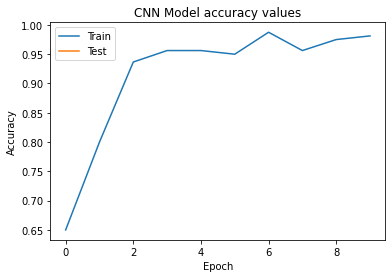

In [ ]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.utils import load_img,img_to_array

import numpy as np
test_model=load_model('/content/mymodel.h5')
img=load_img('/content/drive/MyDrive/CAD/train/Sick/IM00265.jpg', target_size=(224,224))
x=img_to_array(img)
x=np.expand_dims(x, axis=0)
img_dat=preprocess_input(x)
classes=model.predict(img_dat)
print(classes)

1/1 [==============================] - 0s 32ms/step
[[0. 1.]]


In [ ]:
Y_pred = model.predict_generator(test_set, test_set.n // test_set.batch_size+1)
y3_pred = np.argmax(Y_pred, axis=1)


<ipython-input-21-3fa8303ca06e>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_set, test_set.n // test_set.batch_size+1)


In [ ]:
# cm = confusion_matrix(test_set.classes, y3_pred)
# cr = classification_report(test_set.classes, y3_pred, target_names=test_set.class_indices.keys())
# acc = (cm[0][0] + cm[1][1]) / np.sum(cm)
# prec = cm[1][1] / (cm[0][1] + cm[1][1])
# recall = cm[1][1] / (cm[1][0] + cm[1][1])
# print(cm)
# print(cr)
# print(acc)
# print(prec)
# print(recall)

[[215 172]
 [165 149]]
              precision    recall  f1-score   support

      Normal       0.57      0.56      0.56       387
        Sick       0.46      0.47      0.47       314

    accuracy                           0.52       701
   macro avg       0.51      0.52      0.51       701
weighted avg       0.52      0.52      0.52       701

0.5192582025677603
0.46417445482866043
0.4745222929936306


In [ ]:
# from matplotlib import pyplot as plt
# from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

# from sklearn.metrics import confusion_matrix , classification_report
# all_test_images = []
# all_test_labels = []

# # Loop over all the batches of images and labels
# for i in range(test_set.n // test_set.batch_size + 1):
#     # Get the next batch of images and labels as numpy arrays
#     batch_images, batch_labels = test_set.next()
#     # Append the batch arrays to the corresponding all arrays
#     all_test_images.append(batch_images)
#     all_test_labels.append(batch_labels)

# # Concatenate all the batch arrays along the batch axis to get the full arrays
# full_test_images = np.concatenate(all_test_images, axis=0)
# full_test_labels = np.concatenate(all_test_labels, axis=0)

# # Print the shapes of the full arrays
# print('Full images shape:', full_test_images.shape)
# print('Full labels shape:', full_test_labels.shape)


# y_pred=model.predict(full_test_images)

# print(metrics.accuracy_score(full_test_labels, y_pred))



Full images shape: (701, 224, 224, 3)
Full labels shape: (701, 2)
22/22 [==============================] - 3s 120ms/step


NameError: ignored

In [ ]:
print(classes)

[[1.0000000e+00 2.3311372e-36]]


In [ ]:
from PIL import Image
from keras.utils import load_img,img_to_array
from keras.applications.vgg16 import preprocess_input, decode_predictions
import tensorflow as tf

inp_img=Image.open("/content/drive/MyDrive/CAD/train/Normal/1.jpg")
inp_img= inp_img.resize((224, 224))

inp_img = img_to_array(inp_img)
inp_img = tf.
pred=model(inp_img)
print(pred)

ValueError: ignored

In [ ]:
# Initialize empty arrays to store all the images and labels
all_train_images = []
all_train_labels = []

# Loop over all the batches of images and labels
for i in range(train_set.n // train_set.batch_size + 1):
    # Get the next batch of images and labels as numpy arrays
    batch_images, batch_labels = train_set.next()
    # Append the batch arrays to the corresponding all arrays
    all_train_images.append(batch_images)
    all_train_labels.append(batch_labels)

# Concatenate all the batch arrays along the batch axis to get the full arrays
full_train_images = np.concatenate(all_train_images, axis=0)
full_train_labels = np.concatenate(all_train_labels, axis=0)

# Print the shapes of the full arrays
print('Full images shape:', full_train_images.shape)
print('Full labels shape:', full_train_labels.shape)

In [ ]:
feature_extractor=model.predict(train_set)


51/51 [==============================] - 94s 2s/step


In [ ]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)


In [ ]:
X_for_RF = features #This is our X input to RF


In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [ ]:
y_train=[]

Sickfolder = train_path+'/Sick'
Normalfolder = train_path+'/Normal'


onlysickfiles = [f for f in os.listdir(Sickfolder) if os.path.isfile(os.path.join(Sickfolder, f))]
onlynormalfiles = [f for f in os.listdir(Normalfolder) if os.path.isfile(os.path.join(Normalfolder, f))]

sick=len(onlysickfiles)
normal=len(onlynormalfiles)
print(sick," ",normal)


730   900


In [ ]:
# 0 for normal 1 for sick
for i in range(900):
  y_train.append(0)

for i in range(730):
  y_train.append(1)

print(len(y_train))

1630


In [ ]:
# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding


RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
x_test=[]

testSickfolder = test_path+'/Sick'
testNormalfolder = test_path+'/Normal'


testonlysickfiles = [f for f in os.listdir(testSickfolder) if os.path.isfile(os.path.join(testSickfolder, f))]
testonlynormalfiles = [f for f in os.listdir(testNormalfolder) if os.path.isfile(os.path.join(testNormalfolder, f))]

x_test=testonlynormalfiles+testonlynormalfiles
print(len(x_test))

774


In [ ]:
#Send test data through same feature extractor process
X_test_feature = model.predict(test_set)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

22/22 [==============================] - 12s 526ms/step


In [ ]:
prediction_RF = RF_model.predict(X_test_features)


In [ ]:
print(prediction_RF.shape)

NameError: ignored

In [ ]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_set, prediction_RF))

ValueError: ignored